In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
#every chrctr is encoded as a single byte.
print (df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
#dropping unwanted columns
df=df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"],axis=1)

In [4]:
#Renaming
df=df.rename(columns={"v1":"label","v2" : "sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print (len(df))

5572


In [6]:
#no of obsrvtn in each label
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [10]:
print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


In [11]:
# Instantiate the countvctrzer mthd
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [16]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_data, y_train)

MultinomialNB()

In [18]:
#predicting the test set results
y_pred = classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [19]:
#making the confusion mtrx
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred,labels=classifier.classes_)  
print(cm)

[[1193    3]
 [  16  181]]


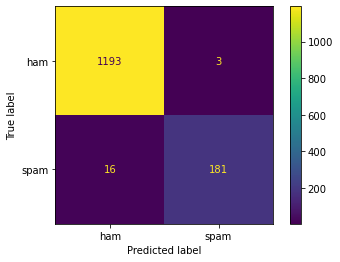

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [21]:
training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print(training_score)
print(test_score)

0.9928212491026561
0.9863603732950467


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy score:{}",format(accuracy_score(y_test,y_pred)))

Accuracy score:{} 0.9863603732950467


In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud

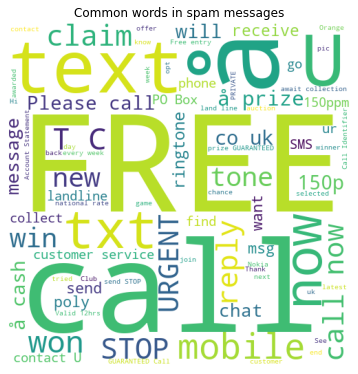

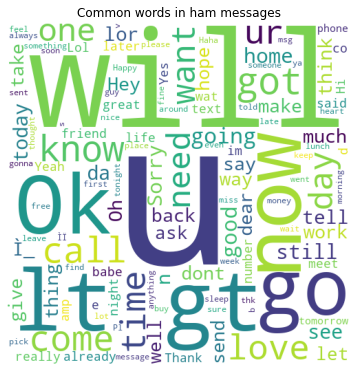

In [25]:
#get spam and ham
spam = df[df['label']=='spam']['sms'].str.cat(sep=', ')
ham = df[df['label']=='ham']['sms'].str.cat(sep=', ')
#initialize wordcloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')
#generate the wordclouds for each type of message
spam_wc = wc.generate(spam)
#plot the wordcloud for spam                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(spam_wc) 
plt.axis("off") 
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0) 
plt.show() 
#plot the wordcloud for ham 
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(ham_wc) 
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0) 
plt.show() 